In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [165]:
df=pd.read_csv('data.csv')

In [166]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Clean & understand Data set


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [168]:
#drop unnamed and id 
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [169]:
df.shape

(569, 31)

Encode target Variable


In [170]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

Feature Selection


In [171]:
#correlation matrix
Correlation =df.corr()

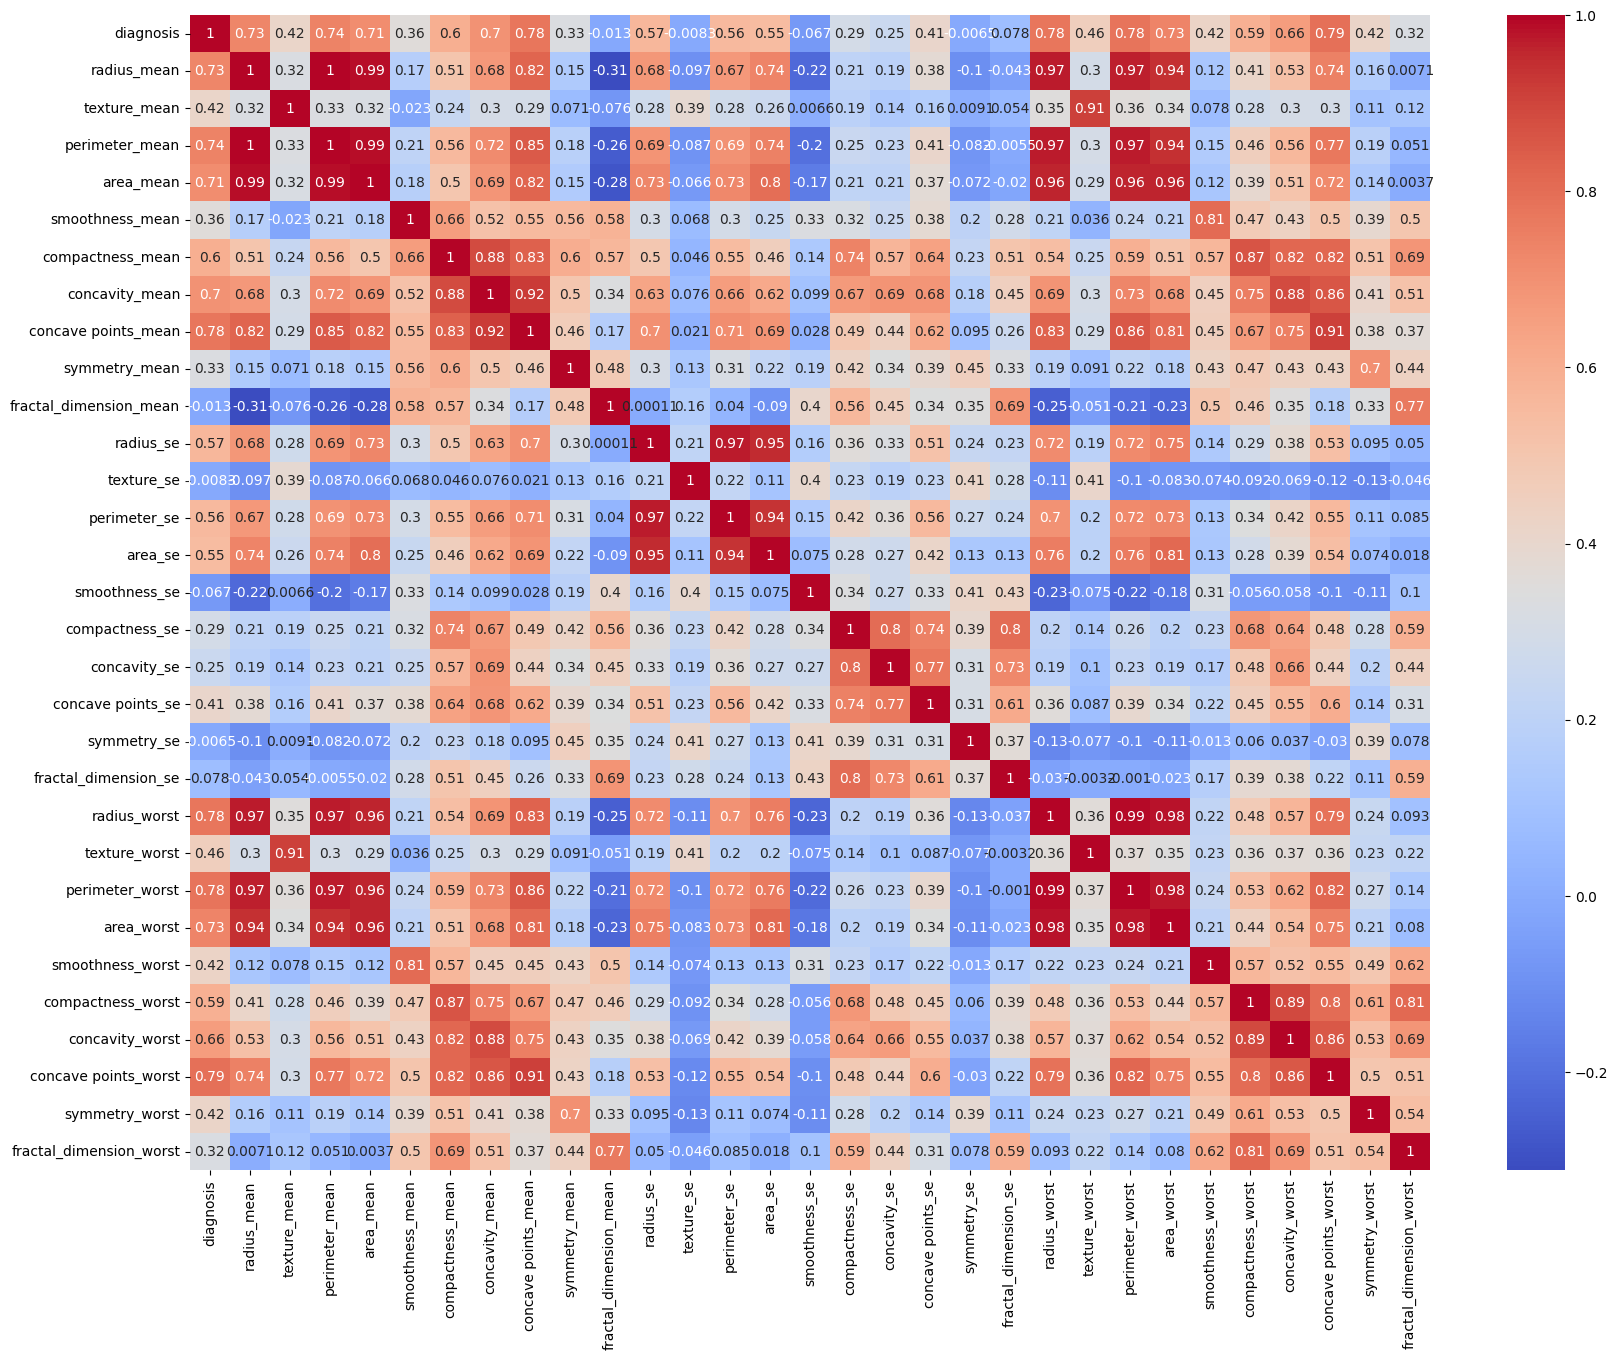

In [172]:
plt.figure(figsize=(20,15))
sns.heatmap(Correlation,annot=True,cmap='coolwarm')
plt.show()

In [173]:
#sort feature based on correlation with diagnosis
top_feature=Correlation['diagnosis'].abs().sort_values(ascending=False)
top_feature

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [174]:
Selected_feature=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concave points_mean']
Selected_feature

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'concave points_mean']

In [175]:
X=df[Selected_feature]
y=df['diagnosis']

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [178]:
pipe=Pipeline([
    ('scalar',StandardScaler()),
    ('svm',SVC(probability=True))

])

In [179]:
#hyperparameter tuning 
param_grid={
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto'] 
}

In [180]:
#cross Validation
cv=StratifiedKFold()

In [181]:
grid=GridSearchCV(pipe,param_grid=param_grid,scoring='accuracy',cv=cv,n_jobs=-1,verbose=1)

In [182]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('svm', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [183]:
grid.best_estimator_

Pipeline(steps=[('scalar', StandardScaler()),
                ('svm', SVC(C=1, kernel='linear', probability=True))])

In [184]:
grid.best_params_

{'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}

In [185]:
grid.best_score_

np.float64(0.9413132694938442)

In [186]:
y_pred=grid.predict(X_test)

In [187]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.951048951048951
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

[[85  4]
 [ 3 51]]


In [191]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities
y_proba = grid.predict_proba(X_test)[:, 1]  # Probability of class 1 (Malignant)

# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Step 3: Compute AUC
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)


AUC Score: 0.9916770703287557


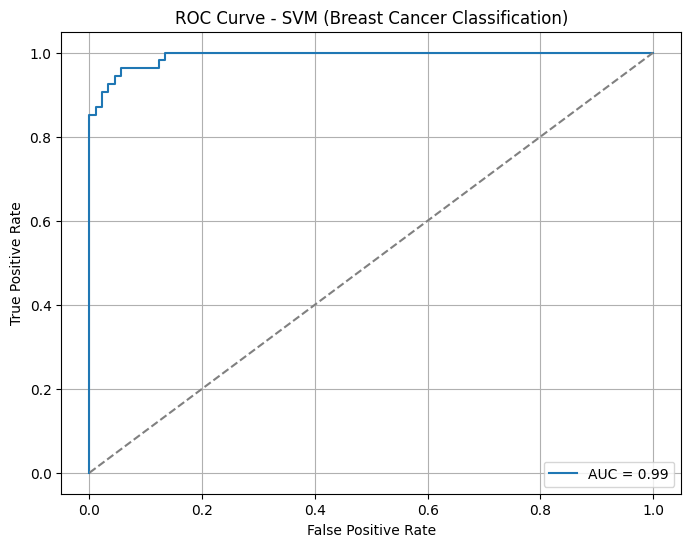

In [190]:
# Step 4: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Breast Cancer Classification)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [192]:
import joblib

joblib.dump(grid,'svm_model.pkl')
print("Model saved")
 

Model saved
